SEMNINAR 1.

## Algoritam k-sredina - implementacija

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import cv2

warnings.filterwarnings("ignore")

Nasumično odabiranje podataka

In [5]:
# generiranje nasumičnih podataka u obliku 2d točke
n = 100
random_points = np.random.randint(0,n,(n,2))

# proizvoljni broj clustera
k = 4

# računanje granica za centroide
max_x = np.max(random_points[:, 0])
min_x = np.min(random_points[:, 0])
max_y = np.max(random_points[:, 1])
min_y = np.min(random_points[:, 1])
random_centroids= np.random.uniform(low=[min_x, min_y], high=[max_x, max_y], size=(k, 2))
all_centroids= random_centroids

In [2]:
# računanje distance između točaka
def euc_dist(p1,p2):
    return np.sum(np.square(p1 - p2))

# raspoređivanje točaka u clustere
def min_length(k, points, centroids):
    categories = np.zeros(len(points))
    for i in range(len(points)): #points
        distances = np.zeros(k)
        for j in range(k): #centroids
            distances[j] = euc_dist(points[i],centroids[j])
        if j == k-1:
            # odaberemo minimalnu distancu između trenutne točke i svih centroida
            min_dist = np.min(distances)
            # odredimo kojem cluseru pripada
            categories[i] = np.where(distances == min_dist)[0]
    return categories

# ažuriranje centroida ovisno o srednjoj vrijednosti svih točaka clustera
def new_centroids(k, points,centroids):
    categories = min_length(k, points,centroids)
    means_per_category = []
    for cat in np.unique(categories):
        category_points = points[categories == cat]
        mean_coordinates = np.mean(category_points, axis=0)
        means_per_category.append((cat, mean_coordinates))
    return np.array([item[1] for item in means_per_category])


Početno stanje grafa sa nasumično odabranim točkama i nasumično odabranim centroidima

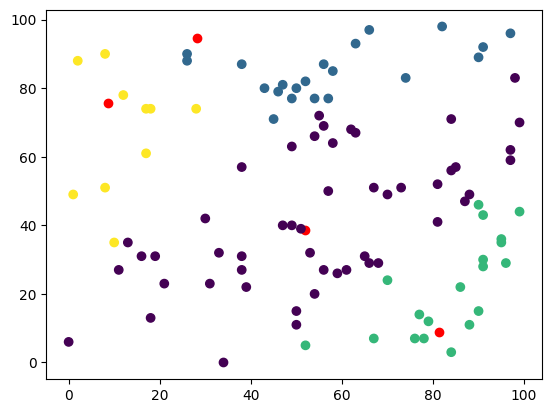

In [8]:
plt.scatter(random_centroids[:,0],random_centroids[:,1], c='red')
plt.scatter(random_points[:, 0], random_points[:, 1], c=min_length(k,random_points,random_centroids), cmap='viridis') 

Graf nakon n iteracija i pomicanja centroida

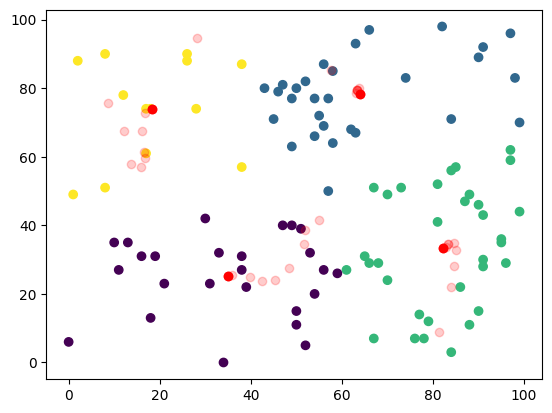

In [9]:
iterations = 10

for _ in range(iterations):
    random_centroids = new_centroids(k,random_points,random_centroids)
    all_centroids = np.concatenate((all_centroids, random_centroids), axis=0)


plt.scatter(random_points[:, 0], random_points[:, 1], c=min_length(k,random_points,random_centroids), cmap='viridis') 
plt.scatter(all_centroids[:,0],all_centroids[:,1], c='red',alpha=0.2)
plt.scatter(random_centroids[:,0],random_centroids[:,1], c='red')

Primjer sa slikom

In [11]:
# broj boja na slici
k = 5

#broj iteracija u algoritmu
iterations= 5

In [6]:
# ažuriranje centroida ovisno o srednjoj vrijednosti svih točaka skupina - prilagođeno za sliku
def new_centroids2(k, points,centroids):
    categories = min_length(k, points,centroids)
    means_per_category = []
    
    default_categ = []
    for i in range(k):
        default_categ.append(float(i))
    
    for cat in default_categ:
        category_points = points[categories == cat]
        mean_coordinates = np.mean(category_points, axis=0)
        means_per_category.append((cat, mean_coordinates))
    return np.array([item[1] for item in means_per_category])



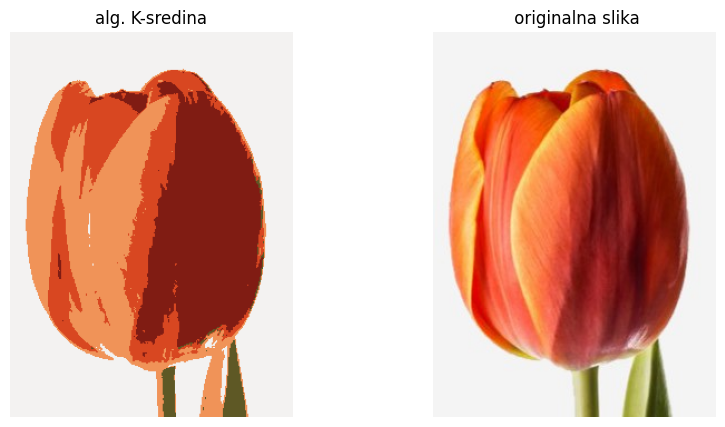

In [13]:

# učitavanje, izravnjavanje slike
image = cv2.imread('tulip2.jpg')  
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_rgb_2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pixels = image_rgb.reshape((-1, 3))


# računanje granica za centroide
max_x = np.max(pixels[:, 0])
min_x = np.min(pixels[:, 0])
max_y = np.max(pixels[:, 1])
min_y = np.min(pixels[:, 1])
max_z = np.max(pixels[:, 2])
min_z = np.min(pixels[:, 2])
random_centroids_image = np.random.uniform(low=[min_x, min_y, min_z], 
                                        high=[max_x, max_y, max_z], 
                                        size=(k, 3))


for _ in range(iterations):
    random_centroids_image = new_centroids2(k, pixels,random_centroids_image)
categories = min_length(k, pixels, random_centroids_image)

for i in range(len(pixels)):
    pixels[i] = random_centroids_image[int(categories[i])]

# prikaz slika
plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 2)
plt.imshow(image_rgb_2)
plt.axis('off')
plt.title(' originalna slika')


plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('alg. K-sredina')



plt.show()
